In [1]:
# Import Some Modules
import numpy as np
import scipy.io as sio
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

# inline plots
%matplotlib inline

In [10]:
raw_speech = sio.loadmat('speech.mat')
speech_vec = raw_speech['X']
speech_type = raw_speech['y'].T[0].T
print(speech_vec.shape, speech_type.shape)

((3686, 400), (3686,))


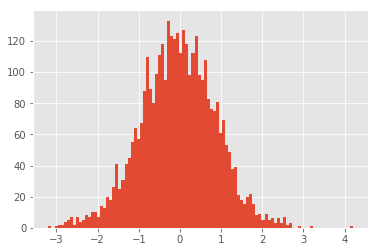

In [11]:
pd.DataFrame(speech_vec)[109].hist(bins = 100)

In [12]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [13]:
norm_speech_vec = feature_normalize(speech_vec)
mu, sigma = estimateGaussian(norm_speech_vec)

In [14]:
result = multivariateGaussian(norm_speech_vec,mu,sigma)
pd.Series(result).describe()

count     3.686000e+03
mean     1.057444e-179
std       0.000000e+00
min      5.056260e-298
25%      1.825936e-248
50%      3.440977e-233
75%      4.993807e-212
max      3.822815e-176
dtype: float64

In [16]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

selectThresholdByCV(result, speech_type)

(0.032576769025367158, array(3.8228145169813747e-179))

In [44]:
X = norm_speech_vec[:2000]
Y = speech_type[:2000]
Xtest = norm_speech_vec[2000:]
Ytest = speech_type[2000:]

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=1,verbose=True)
clf.fit(X,Y)

Iteration 1, loss = 0.48273540
Iteration 2, loss = 0.20711228
Iteration 3, loss = 0.11465486
Iteration 4, loss = 0.07765897
Iteration 5, loss = 0.05780766
Iteration 6, loss = 0.04507210
Iteration 7, loss = 0.03682136
Iteration 8, loss = 0.03057506
Iteration 9, loss = 0.02583990
Iteration 10, loss = 0.02231528
Iteration 11, loss = 0.01935618
Iteration 12, loss = 0.01706123
Iteration 13, loss = 0.01509758
Iteration 14, loss = 0.01347901
Iteration 15, loss = 0.01213049
Iteration 16, loss = 0.01098417
Iteration 17, loss = 0.00998644
Iteration 18, loss = 0.00911242
Iteration 19, loss = 0.00834644
Iteration 20, loss = 0.00768790
Iteration 21, loss = 0.00711525
Iteration 22, loss = 0.00658648
Iteration 23, loss = 0.00613495
Iteration 24, loss = 0.00571451
Iteration 25, loss = 0.00534428
Iteration 26, loss = 0.00500419
Iteration 27, loss = 0.00469928
Iteration 28, loss = 0.00442392
Iteration 29, loss = 0.00416343
Iteration 30, loss = 0.00394480
Iteration 31, loss = 0.00372624
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [46]:
(clf.predict(Xtest) == Ytest).sum()


1662

In [47]:
Ytest.shape[0]

1686